In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "C:/dev/study/Python_Project/chap2/data/"

df = pd.read_csv(f"{file_path}Customer-Churn-Records.csv",sep = ',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [64]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [4]:
df.shape

(10000, 18)

In [5]:
# 결측치 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
(df.isnull().sum()/len(df))

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

## EDA

<Axes: >

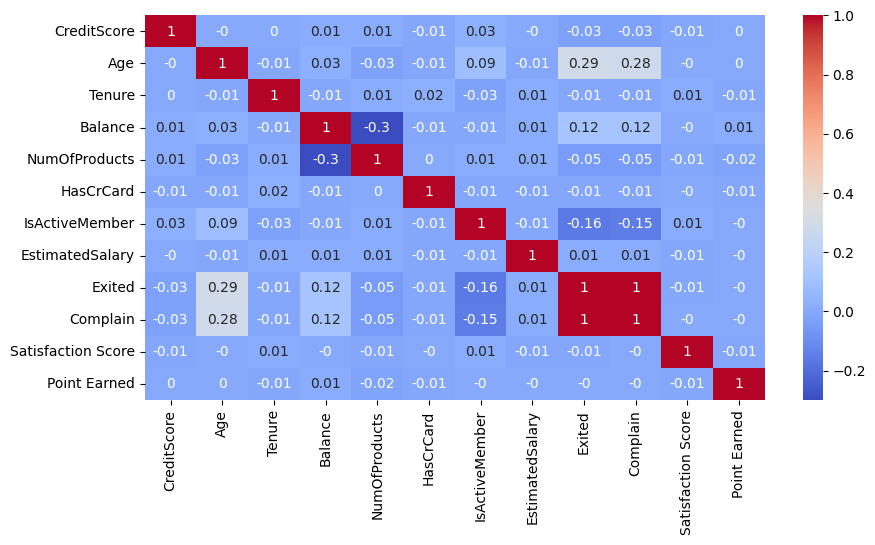

In [7]:
import numpy as np

corr = df.select_dtypes(include=['number']).drop(columns=['RowNumber', 'CustomerId']).corr().round(2)
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

- CreditScore : 신용점수
- Age : 나이
- Tenure : 거래기간
- Balance : 잔액
- NumOfProducts : 제품 보유량 --> 1~4까지, 범주형으로 취급 가능
- EstimateSalary : 급여 수준
- Satisfaction Score : 만족도 --> 1~5, 범주형으로 취급 가능
- Point Earned : 포인트

------------------------------------------------

- Geography : 지역
- Gender : 성별
- Card Type : 카드 등급
- Complain : 컴플레인 유무
- IsActiveMember : 활성/비활성 고객
- HasCrCard : 신용카드 보유 유무

In [8]:
from scipy.stats import chi2_contingency

for col in df.columns:
    table = pd.crosstab(df[col], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(col,":", p<0.05)

RowNumber : False
CustomerId : False
Surname : False
CreditScore : False
Geography : True
Gender : True
Age : True
Tenure : False
Balance : True
NumOfProducts : True
HasCrCard : False
IsActiveMember : True
EstimatedSalary : False
Exited : True
Complain : True
Satisfaction Score : False
Card Type : False
Point Earned : False


In [9]:
# 불필요 column 제거

df_drop = df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [10]:
# 타겟 불균형치
target_ratio = df_drop["Exited"].value_counts(normalize=True)*100
print(target_ratio)

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


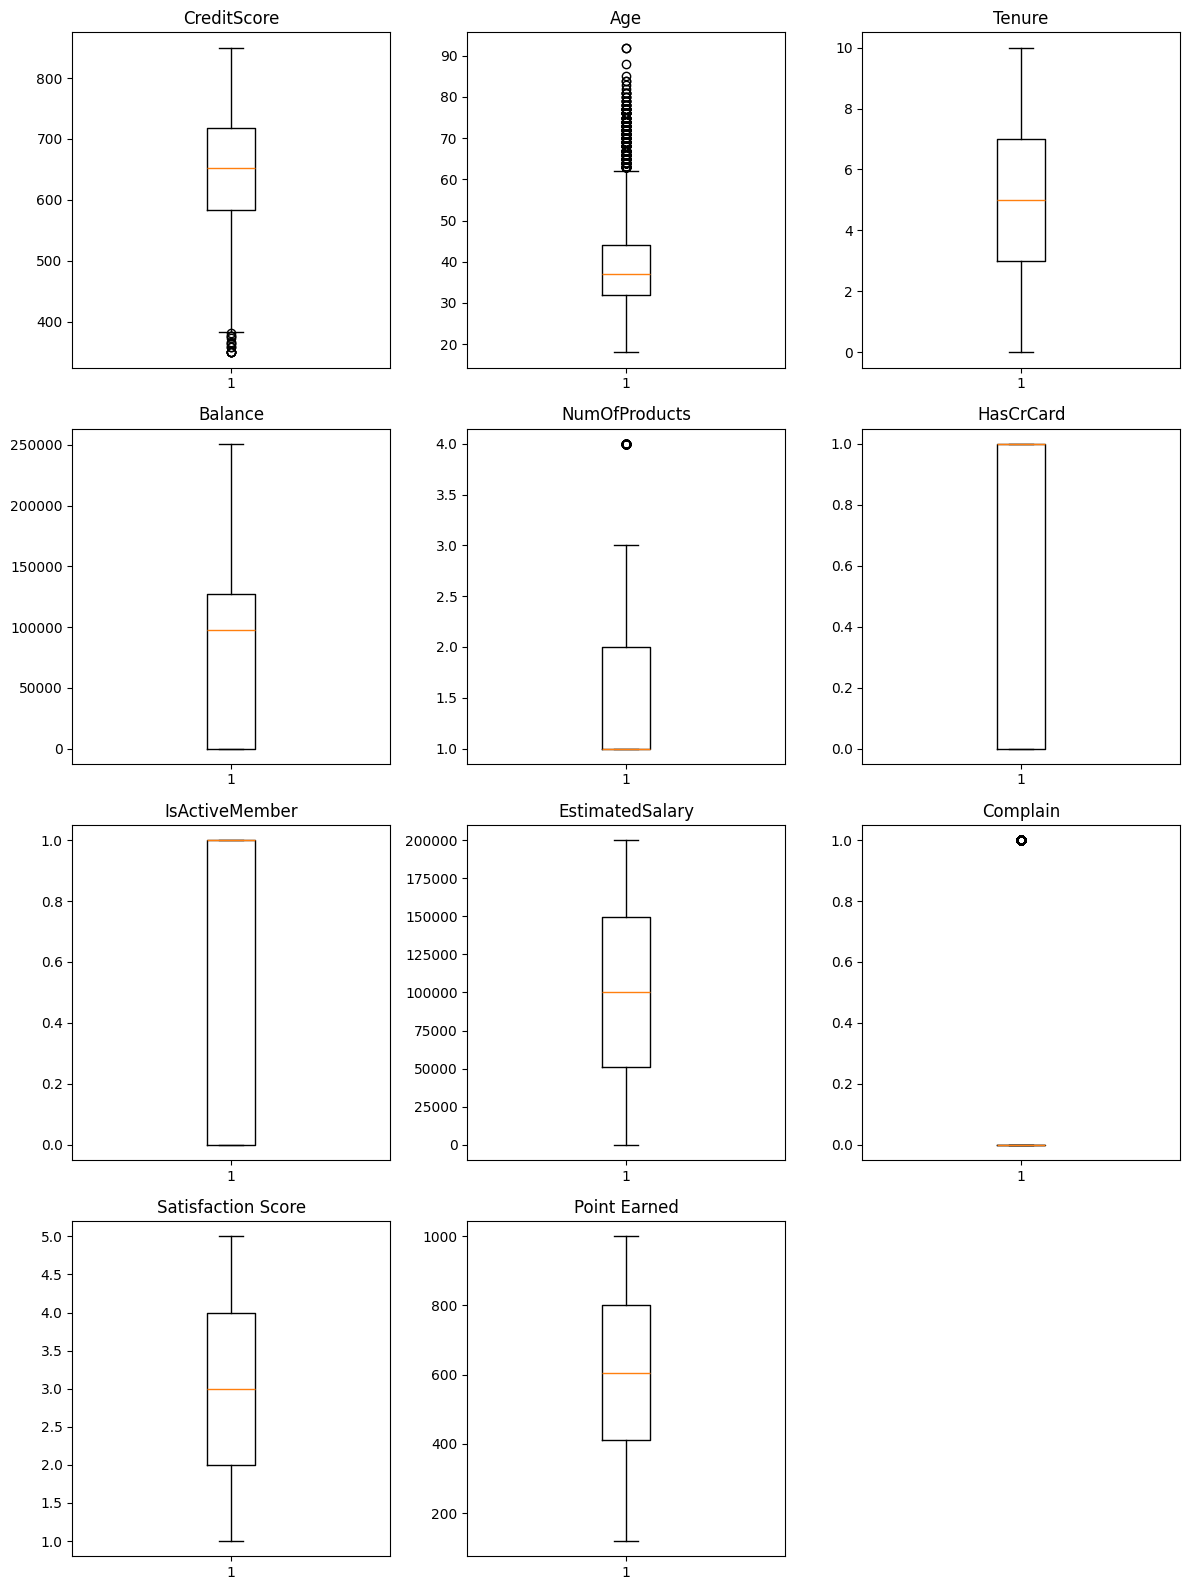

In [11]:
numeric_cols = df_drop.drop(columns=["Exited"]).select_dtypes(include=np.number).columns

# 전체 몇 행이 필요한지 계산
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

# axes를 1차원 배열로 변환해서 루프 돌리기
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df_drop[col].dropna())
    axes[i].set_title(col)

# 남는 subplot은 숨김 처리
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
Q1 = df_drop['Age'].quantile(0.25)
Q3 = df_drop['Age'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 필터링
df_clean = df_drop[(df_drop['Age'] >= lower) & (df_drop['Age'] <= upper)].copy()


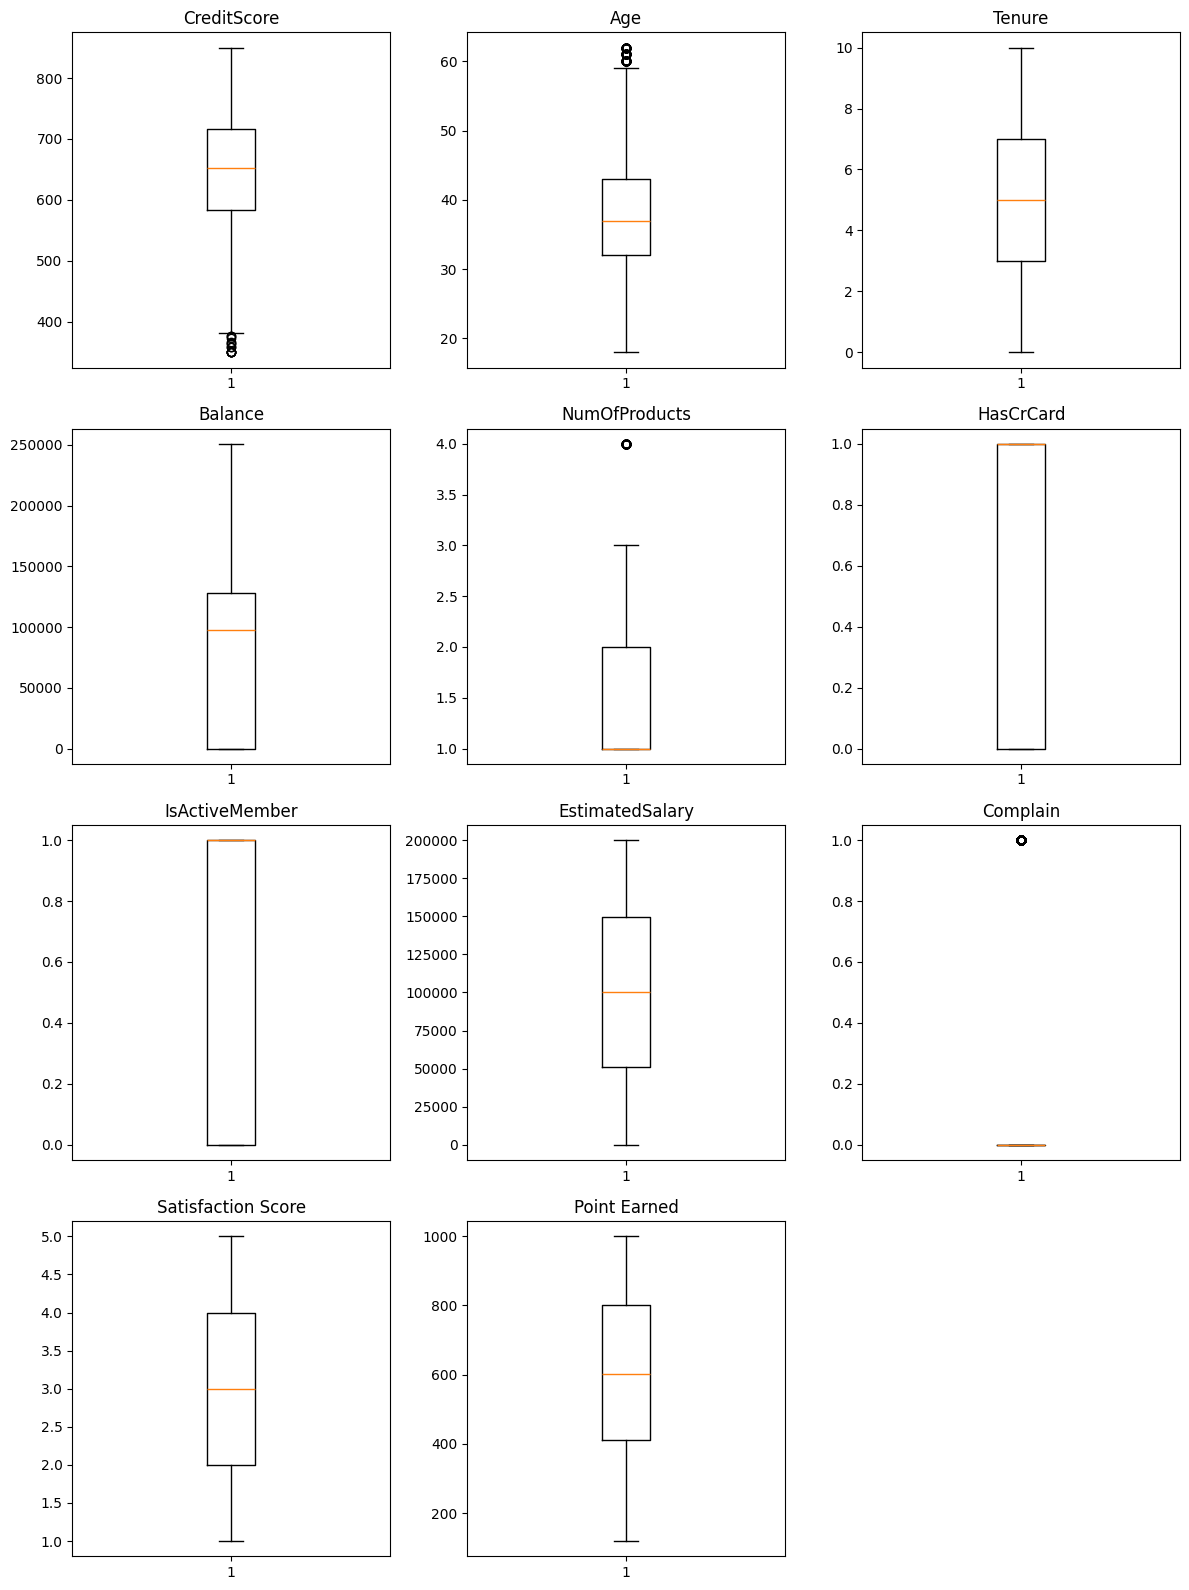

In [13]:
numeric_cols = df_clean.drop(columns=["Exited"]).select_dtypes(include=np.number).columns

# 전체 몇 행이 필요한지 계산
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

# axes를 1차원 배열로 변환해서 루프 돌리기
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df_clean[col].dropna())
    axes[i].set_title(col)

# 남는 subplot은 숨김 처리
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
df_clean["NumOfProducts"].unique()

array([1, 3, 2, 4], dtype=int64)

In [15]:
# 가입 상품 4개 이상은 희귀 --> 3개 이상을 묶음
df_clean["NumOfProducts_"] = df_clean["NumOfProducts"].apply(
    lambda x: str(x) if x < 3 else "3_more"
)

In [16]:
# 잔액 정규화
# df_clean["Balance_log"] = np.log1p(df_clean["Balance"])

In [17]:
numeric_cols = df_clean.drop(columns=["Exited"]).select_dtypes(include=np.number).columns

In [18]:
# p-value 확인 : 각 수치형 feature는 유의미?
from scipy.stats import chi2_contingency

for col in numeric_cols:
    table = pd.crosstab(df_clean[col], df_clean['Exited'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(col,":", p<0.05)

CreditScore : False
Age : True
Tenure : False
Balance : True
NumOfProducts : True
HasCrCard : False
IsActiveMember : True
EstimatedSalary : False
Complain : True
Satisfaction Score : False
Point Earned : False


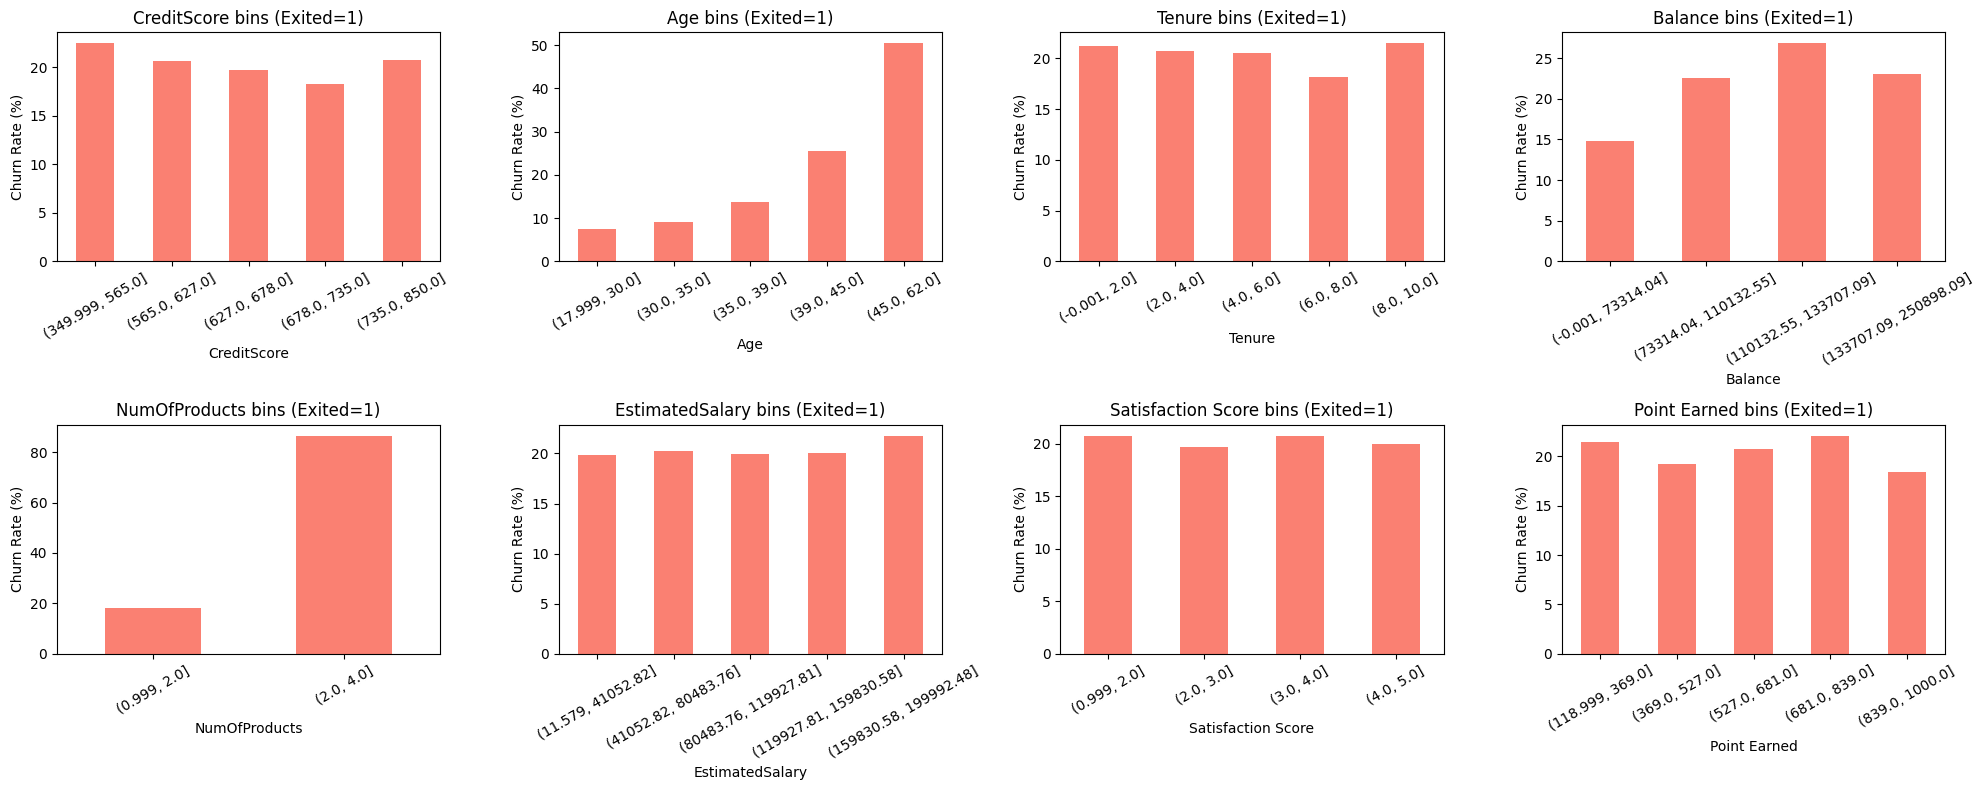

In [19]:
drop_cols = ['Exited']

# 범주형 컬럼
cat_cols = list(df_clean.select_dtypes(include=['object','category']).columns) \
    + ['Complain','IsActiveMember','HasCrCard']

# 수치형 컬럼
num_cols = [col for col in df_clean.columns if col not in cat_cols + drop_cols]

# ---------- 4열 subplot ----------
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    try:
        df_clean['bin'] = pd.qcut(df_clean[col], q=5, duplicates='drop')
        churn_rate = pd.crosstab(df_clean['bin'], df_clean['Exited'], normalize='index') * 100
        churn_rate[1].plot(kind='bar', color='salmon', ax=axes[i])
        axes[i].set_title(f"{col} bins (Exited=1)")
        axes[i].set_ylabel("Churn Rate (%)")
        axes[i].set_xlabel(col)
        axes[i].tick_params(axis='x', rotation=30)
    except ValueError:
        axes[i].text(0.5, 0.5, "Not enough unique values", 
                     ha='center', va='center')
        axes[i].set_title(f"{col} (skipped)")
        axes[i].set_xticks([])
        axes[i].set_yticks([])

# 남는 subplot 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

강한 영향: Age (나이가 많을수록 ↑), NumOfProducts (3개 이상이면 폭증)

중간 영향: CreditScore (낮으면 ↑), Balance (특정 구간 ↑)

약한 영향/무의미: Tenure, EstimatedSalary, Satisfaction Score, Point Earned

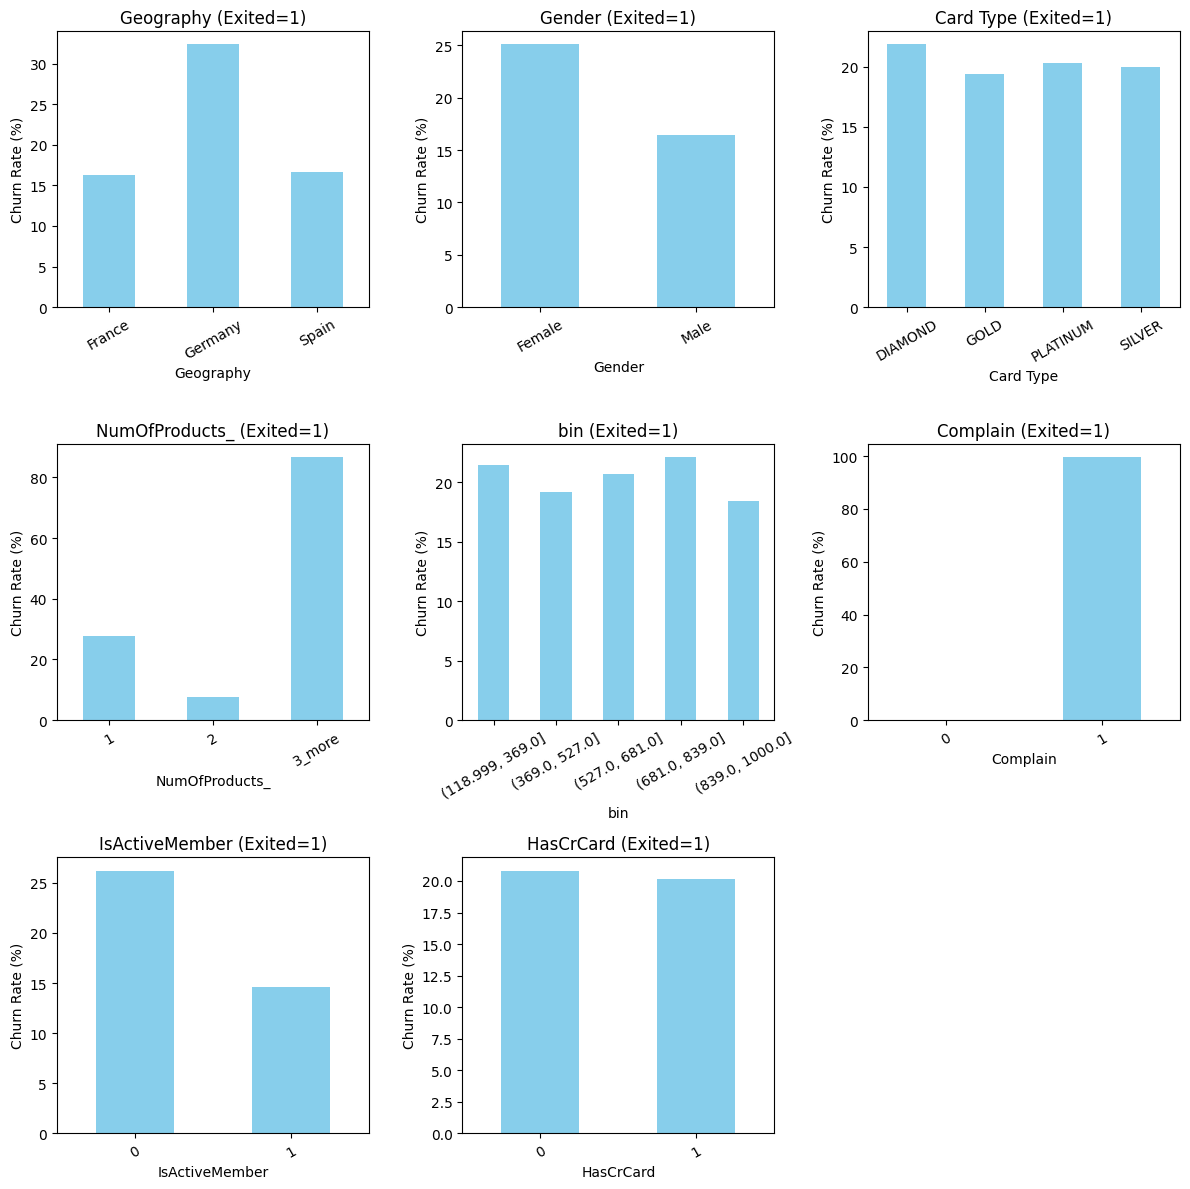

In [20]:
# 범주형 컬럼
cat_cols = [c for c in (list(df_clean.select_dtypes(include=['object','category']).columns) 
                        + ['Complain','IsActiveMember','HasCrCard']) 
            if c != 'Surname']

n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    churn_rate = pd.crosstab(df_clean[col], df_clean['Exited'], normalize='index') * 100
    churn_rate[1].plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col} (Exited=1)")
    axes[i].set_ylabel("Churn Rate (%)")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=30)

# 남는 subplot 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- 강한 영향 변수
    - Complain: 불만 제기 고객 = 이탈 거의 확정적
    - IsActiveMember: 활성 여부에 따라 이탈률 절반 수준 차이
    - Geography: 독일 고객의 이탈률 압도적으로 높음
    - Gender: 여성 고객의 이탈률 더 높음

- 중간 영향 변수
    - Card Type: 일부 차이 있으나 제한적

- 영향 적음
    - HasCrCard, Point Earned

In [21]:
# p-value 확인 : 각 feature는 유의미?
from scipy.stats import chi2_contingency

for col in cat_cols:
    table = pd.crosstab(df_clean[col], df_clean['Exited'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(col,":", p<0.05)

Geography : True
Gender : True
Card Type : False
NumOfProducts_ : True
bin : True
Complain : True
IsActiveMember : True
HasCrCard : False


### feature 조합

- IsActiveMember × HasCrCard
    - 단독 HasCrCard는 영향이 없지만,
    - 비활성 + 신용카드 없음 조합은 이탈을 더 잘 설명할 수 있음.

- Geography × Gender  
    - 독일 + 여성 조합이 특히 이탈률이 높을 가능성.
    - 단순히 성별이나 국가 하나로 설명되지 않는 패턴을 잡을 수 있음.

- Satisfaction Score × Complain
    - 불만 제기는 강한 요인인데, 만족 점수가 낮은데 불만 제기를 안 한 경우도 있을 수 있음.
    - “숨은 불만 고객”을 찾는 데 유용할 수 있음.

- Balance × NumOfProducts
    - 잔액이 많고 상품 수가 많은 고객이 특히 이탈률이 높은지 확인.
    - 단독보다 interaction이 더 설명력이 클 수 있음.

- EstimatedSalary × Age
    - 젊은 고소득층 vs 중장년 저소득층 → 전혀 다른 churn 패턴 가능.

In [22]:
df_clean.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'NumOfProducts_', 'bin'],
      dtype='object')

In [23]:
df_ = df_clean.copy()

# 안전한 형 변환
bin_cols = ['Complain','IsActiveMember','HasCrCard']
for c in bin_cols:
    df_[c] = df_[c].astype(str)

# ===== A. 기본 조합 (강한 변수 중심) =====

# 1) IsActiveMember × HasCrCard (참/거짓 조합)
df_['ia_x_card'] = df_['IsActiveMember'].astype(str) + '_' + df_['HasCrCard'].astype(str)

# 2) Geography × Gender (지역·성별 상호작용)
df_['geo_x_gender'] = df_['Geography'].astype(str) + '_' + df_['Gender'].astype(str)

# 3) Satisfaction Score (bin) × Complain
df_['sat_bin'] = pd.qcut(df_['Satisfaction Score'], q=4, duplicates='drop')
df_['satbin_x_complain'] = df_['sat_bin'].astype(str) + '_' + df_['Complain'].astype(str)

# 4) Balance (bin) × NumOfProducts (bin)
df_['bal_bin']  = pd.qcut(df_['Balance'], q=5, duplicates='drop')
df_['prod_bin'] = pd.cut(df_['NumOfProducts'], bins=[0,1,2,3,4], right=True, include_lowest=True)
df_['balbin_x_prodbin'] = df_['bal_bin'].astype(str) + '_' + df_['prod_bin'].astype(str)

# 5) Age (bin) × EstimatedSalary (bin)
df_['age_bin'] = pd.qcut(df_['Age'], q=5, duplicates='drop')
df_['sal_bin'] = pd.qcut(df_['EstimatedSalary'], q=5, duplicates='drop')
df_['agebin_x_salbin'] = df_['age_bin'].astype(str) + '_' + df_['sal_bin'].astype(str)

# ===== B. '약한 변수'들도 '강한 변수'와 결합하여 시도 =====

# 6) CreditScore (bin) × Geography
df_['cs_bin'] = pd.qcut(df_['CreditScore'], q=5, duplicates='drop')
df_['csbin_x_geo'] = df_['cs_bin'].astype(str) + '_' + df_['Geography'].astype(str)

# 7) Tenure (bin) × IsActiveMember
df_['ten_bin'] = pd.qcut(df_['Tenure'], q=5, duplicates='drop')
df_['tenbin_x_ia'] = df_['ten_bin'].astype(str) + '_' + df_['IsActiveMember'].astype(str)

# 8) Card Type × IsActiveMember  (카디널리티 낮아 안전)
df_['cardtype_x_ia'] = df_['Card Type'].astype(str) + '_' + df_['IsActiveMember'].astype(str)

# 9) Point Earned (bin) × IsActiveMember  또는 × Complain
df_['pt_bin'] = pd.qcut(df_['Point Earned'], q=5, duplicates='drop')
df_['ptbin_x_ia'] = df_['pt_bin'].astype(str) + '_' + df_['IsActiveMember'].astype(str)
df_['ptbin_x_complain'] = df_['pt_bin'].astype(str) + '_' + df_['Complain'].astype(str)

# ===== C. 수치형 상호작용(트리/선형모델 모두에서 유효) =====
# 스케일 민감한 선형 모델을 쓸 땐 이후 표준화 권장
df_['age_x_balance'] = df_['Age'] * df_['Balance']
df_['age_x_products'] = df_['Age'] * df_['NumOfProducts']
df_['balance_x_products'] = df_['Balance'] * df_['NumOfProducts']
df_['cs_x_balance'] = df_['CreditScore'] * df_['Balance']

# ===== D. 정리: 학습에 바로 넣을 때 불필요 임시 bin 컬럼을 남겨둘지 결정 =====
#  임시 bin들을 제거 시 아래 코드 활성화
df_.drop(columns=['sat_bin','bal_bin','prod_bin','age_bin','sal_bin','cs_bin','ten_bin','pt_bin','bin'], inplace=True, errors='ignore')

df_.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'NumOfProducts_', 'ia_x_card', 'geo_x_gender', 'satbin_x_complain',
       'balbin_x_prodbin', 'agebin_x_salbin', 'csbin_x_geo', 'tenbin_x_ia',
       'cardtype_x_ia', 'ptbin_x_ia', 'ptbin_x_complain', 'age_x_balance',
       'age_x_products', 'balance_x_products', 'cs_x_balance'],
      dtype='object')

In [24]:
# p-value 확인 : 각 feature는 유의미?
from scipy.stats import chi2_contingency

true_cols = []
for col in df_.columns:
    table = pd.crosstab(df_[col], df_['Exited'])
    chi2, p, dof, expected = chi2_contingency(table)
    if p<0.05:
        true_cols.append(col)

print(true_cols)

['Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Exited', 'Complain', 'NumOfProducts_', 'ia_x_card', 'geo_x_gender', 'satbin_x_complain', 'balbin_x_prodbin', 'agebin_x_salbin', 'csbin_x_geo', 'tenbin_x_ia', 'cardtype_x_ia', 'ptbin_x_ia', 'ptbin_x_complain', 'age_x_balance', 'age_x_products', 'balance_x_products', 'cs_x_balance']


### SHAP 분석 + SMOTE + XGBoost

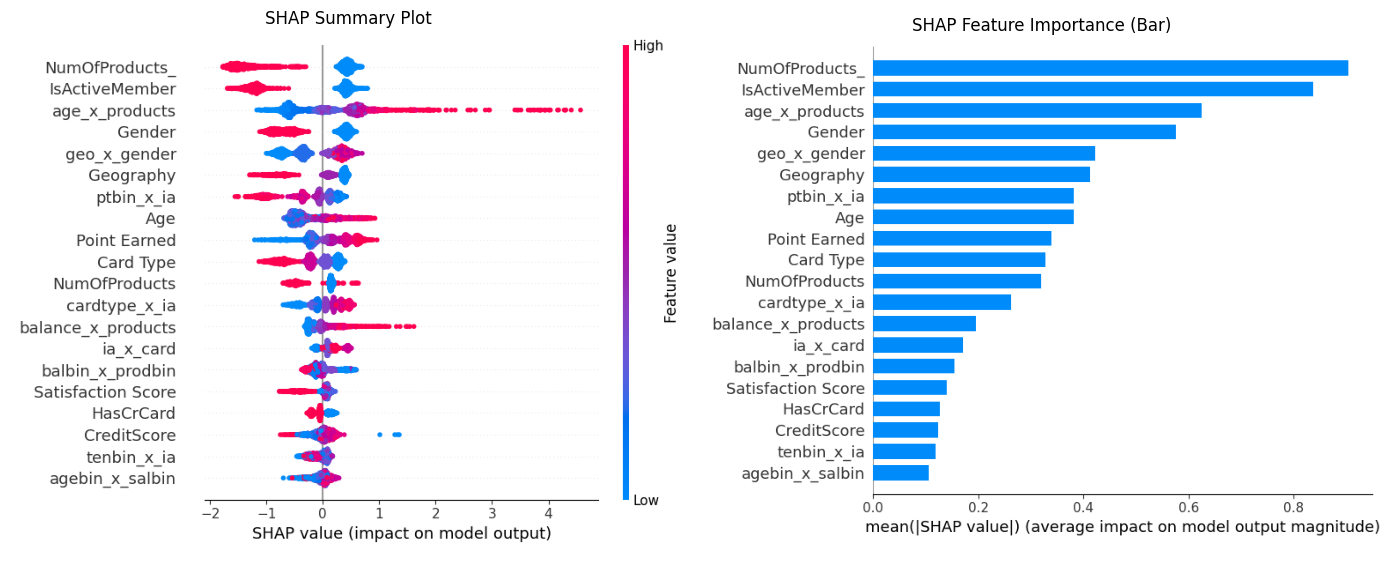

In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# =========================================
# 1. Feature / Target 분리
# =========================================
y = df_['Exited']
X = df_.drop(columns=['Exited','Complain', 'satbin_x_complain', 'ptbin_x_complain'])

# =========================================
# 2. 범주형 처리 (Label Encoding)
#    (XGBoost는 기본적으로 문자열 카테고리 지원 안 됨 → LabelEncoder 필요)
# =========================================
cat_cols = X.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# =========================================
# 3. Train / Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================================
# 4. SMOTE 적용
# =========================================
smote = SMOTE(random_state=42, k_neighbors=5)  # k_neighbors=5 기본값
X_res, y_res = smote.fit_resample(X_train, y_train)

# =========================================
# 5. XGBoost 모델 학습
# =========================================
model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_res, y_res)

# =========================================
# 6. SHAP 값 계산
# =========================================
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# =========================================
# 7. SHAP 요약 플롯/ 중요도 바 플롯
# =========================================
# 각각 개별로 그림 생성 (파일로 저장)
shap.summary_plot(shap_values, X_test, plot_size=(8,6), show=False)
plt.savefig("shap_summary.png", bbox_inches="tight")
plt.close()

shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(8,6), show=False)
plt.savefig("shap_bar.png", bbox_inches="tight")
plt.close()

# 저장한 이미지 불러와서 나란히 붙이기
fig, axes = plt.subplots(1, 2, figsize=(14,6))
img1 = plt.imread("shap_summary.png")
img2 = plt.imread("shap_bar.png")

axes[0].imshow(img1)
axes[0].axis("off")
axes[0].set_title("SHAP Summary Plot")

axes[1].imshow(img2)
axes[1].axis("off")
axes[1].set_title("SHAP Feature Importance (Bar)")

plt.tight_layout()
plt.show()


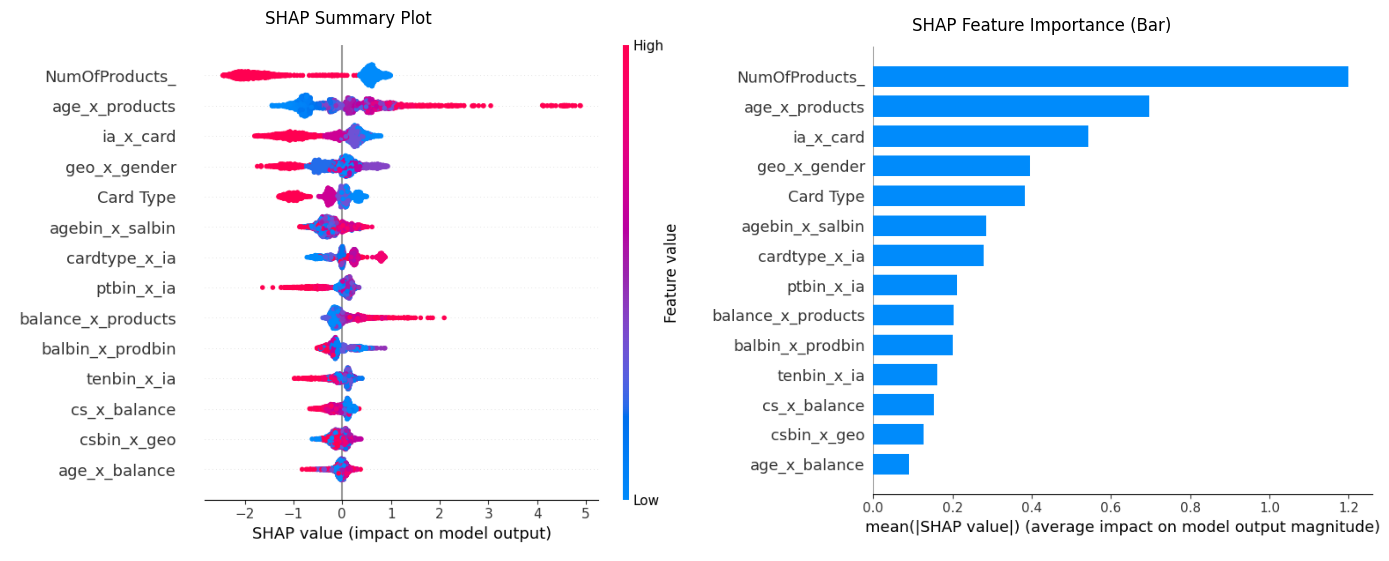

In [26]:
# 조합 feature만 확인(Complain은 어차피 높으니 Complain 조합도 제외)

original_features = [
    'CreditScore','Geography','Gender','Age','Tenure','Balance',
    'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary',
    'Satisfaction Score','Point Earned','Complain' 
]

# 2. 조합 feature만 남기기
combo_features = [c for c in df_.columns if c not in original_features and c not in ['Exited','satbin_x_complain','ptbin_x_complain']]

# =========================================
# 1. Feature / Target 분리
# =========================================
y = df_['Exited']
X = df_[combo_features]

# =========================================
# 2. 범주형 처리 (Label Encoding)
#    (XGBoost는 기본적으로 문자열 카테고리 지원 안 됨 → LabelEncoder 필요)
# =========================================
cat_cols = X.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# =========================================
# 3. Train / Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# =========================================
# 4. SMOTE 적용
# =========================================
smote = SMOTE(random_state=42, k_neighbors=5)  # k_neighbors=5 기본값
X_res, y_res = smote.fit_resample(X_train, y_train)


# =========================================
# 5. XGBoost 모델 학습
# =========================================
model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_res, y_res)

# =========================================
# 6. SHAP 값 계산
# =========================================
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# =========================================
# 7. SHAP 요약 플롯
# =========================================
shap.summary_plot(shap_values, X_test, plot_size=(8,6), show=False)
plt.savefig("shap_summary.png", bbox_inches="tight")
plt.close()

shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(8,6), show=False)
plt.savefig("shap_bar.png", bbox_inches="tight")
plt.close()

# 저장한 이미지 불러와서 나란히 붙이기
fig, axes = plt.subplots(1, 2, figsize=(14,6))
img1 = plt.imread("shap_summary.png")
img2 = plt.imread("shap_bar.png")

axes[0].imshow(img1)
axes[0].axis("off")
axes[0].set_title("SHAP Summary Plot")

axes[1].imshow(img2)
axes[1].axis("off")
axes[1].set_title("SHAP Feature Importance (Bar)")

plt.tight_layout()
plt.show()


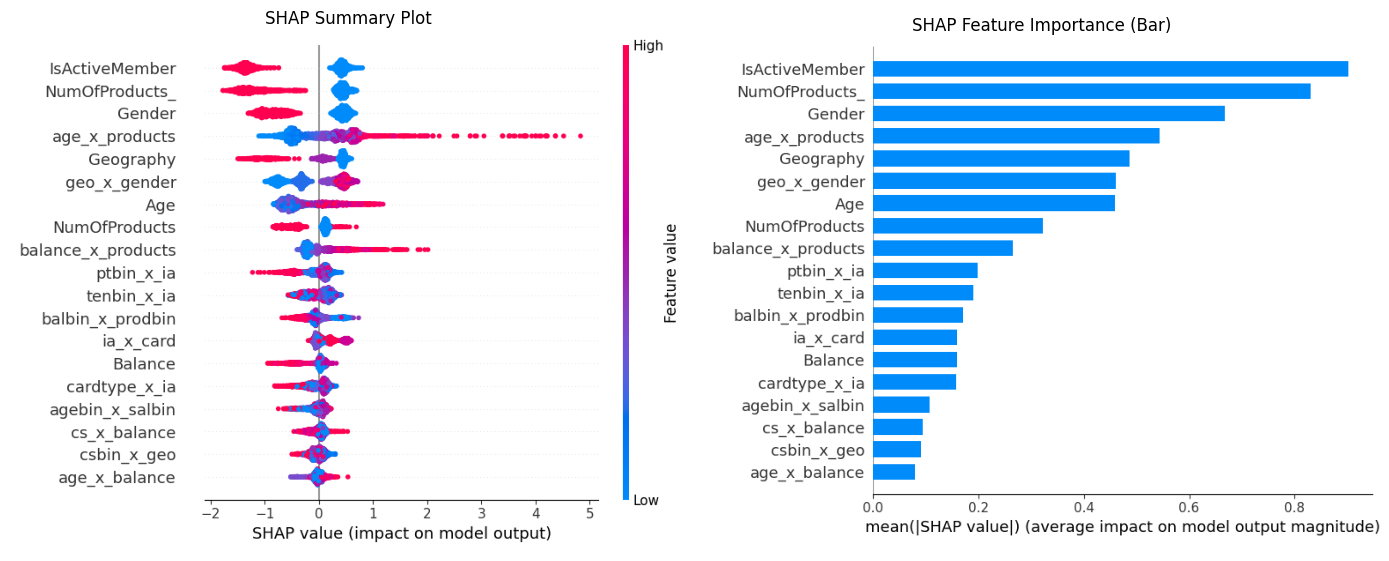

In [27]:
# 유의미한 column

df_p_value = df_[true_cols]
# =========================================
# 1. Feature / Target 분리
# =========================================
y = df_p_value['Exited']
X = df_p_value.drop(columns=['Exited','Complain', 'satbin_x_complain', 'ptbin_x_complain'])

# =========================================
# 2. 범주형 처리 (Label Encoding)
#    (XGBoost는 기본적으로 문자열 카테고리 지원 안 됨 → LabelEncoder 필요)
# =========================================
cat_cols = X.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# =========================================
# 3. Train / Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================================
# 4. SMOTE 적용
# =========================================
smote = SMOTE(random_state=42, k_neighbors=5)  # k_neighbors=5 기본값
X_res, y_res = smote.fit_resample(X_train, y_train)


# =========================================
# 5. XGBoost 모델 학습
# =========================================
model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_res, y_res)


# =========================================
# 6. SHAP 값 계산
# =========================================
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# =========================================
# 7. SHAP 요약 플롯
# =========================================
shap.summary_plot(shap_values, X_test, plot_size=(8,6), show=False)
plt.savefig("shap_summary.png", bbox_inches="tight")
plt.close()

shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(8,6), show=False)
plt.savefig("shap_bar.png", bbox_inches="tight")
plt.close()

# 저장한 이미지 불러와서 나란히 붙이기
fig, axes = plt.subplots(1, 2, figsize=(14,6))
img1 = plt.imread("shap_summary.png")
img2 = plt.imread("shap_bar.png")

axes[0].imshow(img1)
axes[0].axis("off")
axes[0].set_title("SHAP Summary Plot")

axes[1].imshow(img2)
axes[1].axis("off")
axes[1].set_title("SHAP Feature Importance (Bar)")

plt.tight_layout()
plt.show()


In [28]:
df_.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'NumOfProducts_', 'ia_x_card', 'geo_x_gender', 'satbin_x_complain',
       'balbin_x_prodbin', 'agebin_x_salbin', 'csbin_x_geo', 'tenbin_x_ia',
       'cardtype_x_ia', 'ptbin_x_ia', 'ptbin_x_complain', 'age_x_balance',
       'age_x_products', 'balance_x_products', 'cs_x_balance'],
      dtype='object')

▶ ALL: 26 features
▶ COMBO: 14 features
▶ PVAL_TRUE: 19 features
▶ RECOMMENDED: 10 features

==== CV Summary (mean ± std) ====
   PVAL_TRUE | AUC 0.8645±0.0086 | F1 0.5903±0.0193 | ACC 0.8610±0.0061 | features: 19
         ALL | AUC 0.8618±0.0103 | F1 0.5975±0.0238 | ACC 0.8639±0.0070 | features: 26
 RECOMMENDED | AUC 0.8616±0.0079 | F1 0.6124±0.0222 | ACC 0.8577±0.0072 | features: 10
       COMBO | AUC 0.8608±0.0086 | F1 0.5849±0.0137 | ACC 0.8598±0.0047 | features: 14


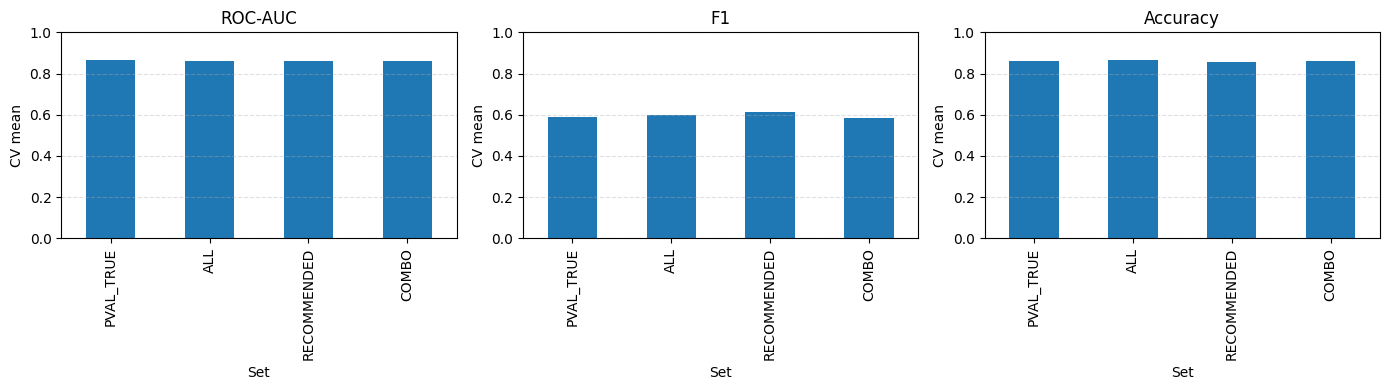

In [29]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline

# chatgpt 추천 컬럼
recommended_cols = [
    "NumOfProducts_", 
    "IsActiveMember", 
    "age_x_products", 
    "Gender", 
    "Geography",
    "Age", 
    "Balance", 
    "Point Earned",
    "balance_x_products",
    "geo_x_gender"
]

# ============= 공통 준비 =============
TARGET_COL = "Exited"
drop_if_exist = ['Complain', 'satbin_x_complain', 'ptbin_x_complain']  # 있으면 제거

df_eval = df_.copy()
cols_to_drop = [c for c in drop_if_exist if c in df_eval.columns]
df_eval = df_eval.drop(columns=cols_to_drop)

y = df_eval[TARGET_COL]
X_all_full = df_eval.drop(columns=[TARGET_COL]).copy()

# ------ 피처 세트 정의 ------
# 제공받은 리스트: combo_features, true_cols, recommended_cols (이미 존재한다고 가정)
true_cols_clean = [c for c in true_cols if c != TARGET_COL]  # Exited 제거

# 실제 존재하는 컬럼만 남기기(오타/누락 보호)
def intersect_existing(cols):
    return [c for c in cols if c in X_all_full.columns]

feature_sets = {
    "ALL": list(X_all_full.columns),                      # 전체
    "COMBO": intersect_existing(combo_features),          # 조합만
    "PVAL_TRUE": intersect_existing(true_cols_clean),     # 유의미(Exited 제거됨)
    "RECOMMENDED": intersect_existing(recommended_cols),  # 추천
}

# 빈 세트 방지 체크
for k, v in feature_sets.items():
    if len(v) == 0:
        raise ValueError(f"Feature set '{k}' has no valid columns. Check your lists.")

# ------ 파이프라인 빌더 ------
def make_pipeline(X):
    cat_cols = list(X.select_dtypes(include=['object', 'category']).columns)
    num_cols = [c for c in X.columns if c not in cat_cols]

    preproc = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ("num", "passthrough", num_cols),
        ],
        remainder="drop"
    )

    model = xgb.XGBClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=5,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, eval_metric='logloss'
    )

    pipe = ImbPipeline(steps=[
        ("preproc", preproc),                # 1) 인코딩
        ("smote", SMOTE(random_state=42)),   # 2) SMOTE (train fold에만)
        ("clf", model),                      # 3) 모델
    ])
    return pipe

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"AUC": "roc_auc", "F1": "f1", "ACC": "accuracy"}

def evaluate_feature_set(name, X):
    pipe = make_pipeline(X)
    cvres = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    return {m: cvres[f"test_{m}"] for m in scoring.keys()}

# ============= 실행: 4세트 비교 =============
all_results = {}
for name, cols in feature_sets.items():
    X_sel = X_all_full[cols].copy()
    print(f"▶ {name}: {len(cols)} features")
    all_results[name] = evaluate_feature_set(name, X_sel)

# ============= 표로 요약 =============
rows = []
for name, metrics in all_results.items():
    row = {"Set": name}
    for m, arr in metrics.items():
        row[f"{m}_mean"] = arr.mean()
        row[f"{m}_std"]  = arr.std()
    row["n_features"] = len(feature_sets[name])
    rows.append(row)

df_summary = pd.DataFrame(rows).set_index("Set").sort_values("AUC_mean", ascending=False)
print("\n==== CV Summary (mean ± std) ====")
for idx, r in df_summary.iterrows():
    print(f"{idx:>12} | AUC {r['AUC_mean']:.4f}±{r['AUC_std']:.4f} | "
          f"F1 {r['F1_mean']:.4f}±{r['F1_std']:.4f} | "
          f"ACC {r['ACC_mean']:.4f}±{r['ACC_std']:.4f} | "
          f"features: {int(r['n_features'])}")

# ============= 막대 그래프(세트별 AUC/F1/ACC) =============
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
metrics_order = ["AUC_mean", "F1_mean", "ACC_mean"]
titles = ["ROC-AUC", "F1", "Accuracy"]

for ax, m, t in zip(axes, metrics_order, titles):
    df_summary[m].plot(kind="bar", ax=ax)
    ax.set_title(t)
    ax.set_ylabel("CV mean")
    ax.set_ylim(0, 1)
    ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


### catboost + SHAP : "ia_x_card","cardtype_x_ia" 컬럼 추가

0:	test: 0.8205974	best: 0.8205974 (0)	total: 174ms	remaining: 2m 19s
100:	test: 0.8689642	best: 0.8690636 (98)	total: 5.73s	remaining: 39.7s
200:	test: 0.8710225	best: 0.8712163 (195)	total: 11.9s	remaining: 35.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.871216338
bestIteration = 195

Shrink model to first 196 iterations.


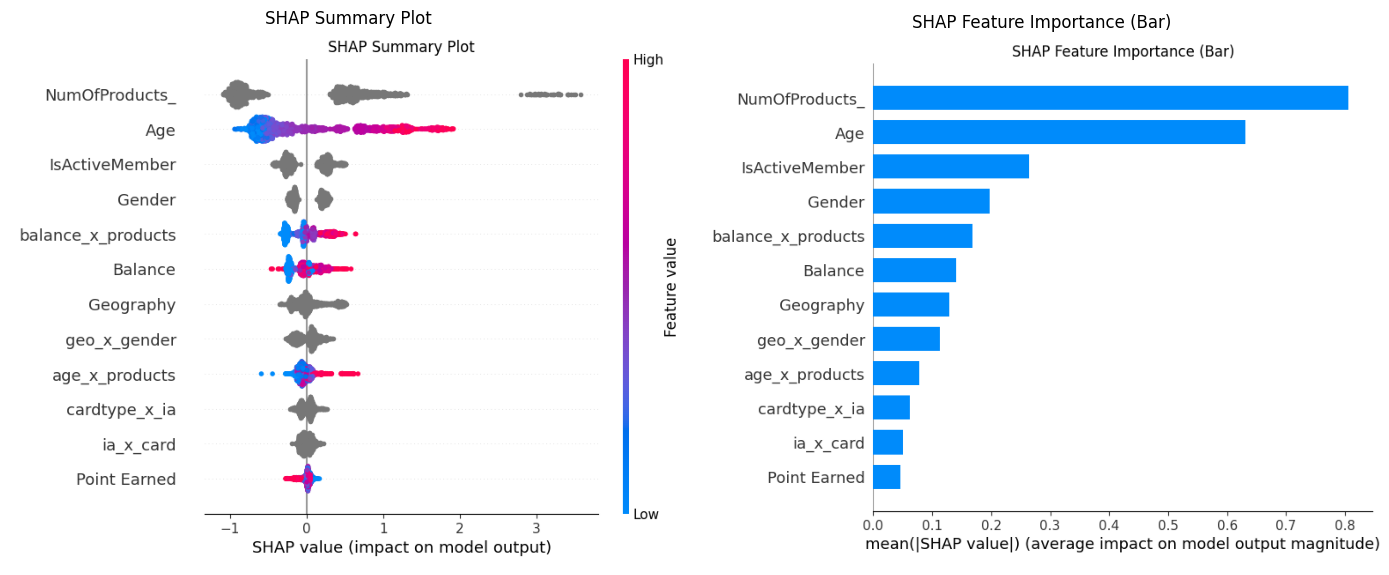

AUC : 0.8712163379983036
F1  : 0.6365591397849463


In [30]:

from catboost import CatBoostClassifier, Pool

# -----------------------------
# 0) 추천 컬럼만 사용
# -----------------------------
recommended_cols = [
    "NumOfProducts_", "IsActiveMember", "age_x_products", "Gender", "Geography",
    "Age", "Balance", "Point Earned", "balance_x_products", "geo_x_gender","ia_x_card",
    "cardtype_x_ia"
]

df_use = df_.copy()  # 원본에서 작업
y = df_use["Exited"]
X = df_use[recommended_cols].copy()

# CatBoost용 범주형 컬럼 인덱스
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
cat_idx = [X.columns.get_loc(c) for c in cat_cols]

# -----------------------------
# 1) Train / Test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_pool = Pool(X_train, y_train, cat_features=cat_idx)
valid_pool = Pool(X_test, y_test, cat_features=cat_idx)

# -----------------------------
# 2) CatBoost 학습
# -----------------------------
model = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    iterations=800,            # 필요시 500~1000 사이로 조정
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3.0,
    random_state=42,
    auto_class_weights="Balanced",  # 클래스 불균형 자동 가중치
    verbose=100
)
model.fit(train_pool, eval_set=valid_pool, use_best_model=True, early_stopping_rounds=100)

# -----------------------------
# 3) SHAP 값 계산 (CatBoost 내장)
#    반환: (n_samples, n_features+1)  마지막 열은 base value
# -----------------------------
shap_mat = model.get_feature_importance(valid_pool, type="ShapValues")
shap_values = shap_mat[:, :-1]  # 마지막 열 제외
expected_value = shap_mat[:, -1].mean()

# -----------------------------
# 4) SHAP 플롯 저장 후 한 행으로 병합 표시
# -----------------------------
# 개별 그림 저장
shap.summary_plot(shap_values, X_test, show=False, plot_size=(8,6))
plt.title("SHAP Summary Plot")
plt.savefig("cat_shap_summary.png", bbox_inches="tight"); plt.close()

shap.summary_plot(shap_values, X_test, plot_type="bar", show=False, plot_size=(8,6))
plt.title("SHAP Feature Importance (Bar)")
plt.savefig("cat_shap_bar.png", bbox_inches="tight"); plt.close()

# 병합 표시
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(plt.imread("cat_shap_summary.png")); axes[0].axis("off"); axes[0].set_title("SHAP Summary Plot")
axes[1].imshow(plt.imread("cat_shap_bar.png"));     axes[1].axis("off"); axes[1].set_title("SHAP Feature Importance (Bar)")
plt.tight_layout(); plt.show()

# -----------------------------
# 5) 참고: 간단 성능 지표 (원하시면)
# -----------------------------
from sklearn.metrics import roc_auc_score, f1_score

proba = model.predict_proba(valid_pool)[:,1]
pred  = (proba >= 0.5).astype(int)   # 임곗값 조정 시 F1 개선 가능
print("AUC :", roc_auc_score(y_test, proba))
print("F1  :", f1_score(y_test, pred))


### Randomforest

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.over_sampling import SMOTENC

# -----------------------------
# 0) 추천 컬럼만 사용
# -----------------------------
recommended_cols = [
    "NumOfProducts_", "IsActiveMember", "age_x_products", "Gender", "Geography",
    "Age", "Balance", "Point Earned", "balance_x_products", "geo_x_gender",
    "ia_x_card", "cardtype_x_ia"
]

df_use = df_.copy()
X = df_use[recommended_cols].copy()
y = df_use["Exited"].copy()

# -----------------------------
# 1) Train / Test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 2) LabelEncoder: train에만 fit, test는 transform
# -----------------------------
cat_cols = X_train.select_dtypes(include=["object","category"]).columns.tolist()
encoders = {}
for c in cat_cols:
    le = LabelEncoder()
    X_train[c] = le.fit_transform(X_train[c].astype(str))
    # test에 없는 카테고리는 -1로 매핑
    classes_set = set(le.classes_)
    X_test[c]  = X_test[c].astype(str).map(lambda v: le.transform([v])[0] if v in classes_set else -1)
    encoders[c] = le

# -----------------------------
# 3) SMOTENC (train에만, DataFrame로 복구하여 컬럼명 유지)
# -----------------------------
cat_idx = [X_train.columns.get_loc(c) for c in cat_cols]
smote = SMOTENC(categorical_features=cat_idx, random_state=42, k_neighbors=5)
X_res_np, y_res = smote.fit_resample(X_train.values, y_train.values)

# ndarray -> DataFrame (열 이름 복구)
X_res = pd.DataFrame(X_res_np, columns=X_train.columns)
print(X_res.columns)

# -----------------------------
# 4) RandomForest 학습
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,           # 필요 시 8~12로 제한해서 비교
    min_samples_leaf=10,      # 과적합 제어
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)
rf.fit(X_res, y_res)

# 테스트셋 열 순서/이름을 모델과 맞춤(안전장치)
X_test_aligned = X_test[rf.feature_names_in_].copy()

# # -----------------------------
# # 5) SHAP (양성 클래스)
# # -----------------------------
# explainer = shap.TreeExplainer(rf)
# shap_list = explainer.shap_values(X_test_aligned)  # DataFrame 그대로
# sv_pos = shap_list[1] if isinstance(shap_list, list) else shap_list

# # 요약 플롯
# shap.summary_plot(sv_pos, X_test_aligned, plot_size=(8,6), show=False)
# plt.title("SHAP Summary Plot (RF, Exited=1)")
# plt.tight_layout()
# plt.show()

# # 바 플롯
# shap.summary_plot(sv_pos, X_test_aligned, plot_type="bar", plot_size=(8,6), show=False)
# plt.title("SHAP Feature Importance (Bar)")
# plt.tight_layout()
# plt.show()

# -----------------------------
# 6) 성능 지표
# -----------------------------
proba = rf.predict_proba(X_test_aligned)[:, 1]
pred  = (proba >= 0.5).astype(int)
print("AUC :", roc_auc_score(y_test, proba))
print("F1  :", f1_score(y_test, pred))


Index(['NumOfProducts_', 'IsActiveMember', 'age_x_products', 'Gender',
       'Geography', 'Age', 'Balance', 'Point Earned', 'balance_x_products',
       'geo_x_gender', 'ia_x_card', 'cardtype_x_ia'],
      dtype='object')
AUC : 0.8618201335877863
F1  : 0.6244019138755981


In [32]:
true_cols

['Geography',
 'Gender',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'Exited',
 'Complain',
 'NumOfProducts_',
 'ia_x_card',
 'geo_x_gender',
 'satbin_x_complain',
 'balbin_x_prodbin',
 'agebin_x_salbin',
 'csbin_x_geo',
 'tenbin_x_ia',
 'cardtype_x_ia',
 'ptbin_x_ia',
 'ptbin_x_complain',
 'age_x_balance',
 'age_x_products',
 'balance_x_products',
 'cs_x_balance']

In [37]:
# ===== 1) 타깃/피처 분리 =====
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import numpy as np
import xgboost as xgb

TARGET_COL = "Exited"
y = df_[TARGET_COL].astype(int)

# (권장) 과도한 조합/임시 bin 열은 잠시 제외하고 "핵심 신호" 위주로 시작
# 필요 시 여기 목록만 수정해 보며 영향 확인해보세요.
base_cols = [
    "Age", "Balance", "NumOfProducts", "IsActiveMember",
    "Geography", "Gender", "EstimatedSalary", "Complain"
]
# 실제 존재하는 컬럼만 필터
use_cols = [c for c in base_cols if c in df_.columns]
X = df_[use_cols].copy()

# ===== 2) 전처리 파이프라인 (누수 방지: Fold 안에서 fit) =====
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preproc = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

model = xgb.XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=5,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42, eval_metric='logloss'
)

pipe = Pipeline(steps=[
    ("preproc", preproc),
    ("clf", model),
])

# ===== 3) Stratified K-Fold =====
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [39]:
# ===== SMOTENC(≈60:40) + CV 파이프라인 =====
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline

# 1) 범주형/수치형 "이름" 목록 (원본 DataFrame 기준)
cat_like = cat_cols + [c for c in ["IsActiveMember", "Complain"] if c in X.columns]
cat_like = list(dict.fromkeys(cat_like))  # 중복 제거
num_like = [c for c in X.columns if c not in cat_like]

# 2) 이름 → 인덱스 변환 (SMOTENC와 전처리 모두 인덱스로 쓰기)
cat_idx = [X.columns.get_loc(c) for c in cat_like]
num_idx = [X.columns.get_loc(c) for c in num_like]

# 60:40 정도로 맞추기 → 다수 클래스 대비 0.67배 증강
smote = SMOTENC(
    categorical_features=cat_idx,
    sampling_strategy=0.67,   # ≈ 60:40 비율
    random_state=42,
    k_neighbors=5
)

# 주의: 누수 방지를 위해 'SMOTE → 인코딩 → 모델' 순서로 Fold 안에서 수행
pipe = ImbPipeline(steps=[
    ("smote", smote),         # 원본 X에서 소수 클래스 합성(범주형 인덱스 기준)
    ("preproc", preproc),     # 그 다음 원-핫 인코딩 등 전처리
    ("clf", model),           # 마지막 분류기
])

# 그대로 교차검증 실행
cvres = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

acc_mean, acc_std = cvres["test_ACC"].mean(), cvres["test_ACC"].std()
f1_mean,  f1_std  = cvres["test_F1"].mean(),  cvres["test_F1"].std()

print("==== 5-Fold CV (SMOTENC ~60:40) ====")
print(f"Accuracy : {acc_mean:.4f} ± {acc_std:.4f}")
print(f"F1       : {f1_mean:.4f} ± {f1_std:.4f}")
print("Per-fold ACC:", np.round(cvres["test_ACC"], 4))
print("Per-fold F1 :", np.round(cvres["test_F1"], 4))


==== 5-Fold CV (SMOTENC ~60:40) ====
Accuracy : 0.9985 ± 0.0014
F1       : 0.9964 ± 0.0033
Per-fold ACC: [0.999  0.9995 0.9959 0.9995 0.999 ]
Per-fold F1 : [0.9975 0.9987 0.9898 0.9987 0.9975]


In [41]:
# 1) 이탈률 점검
print(pd.crosstab(X["Complain"], y, normalize=0))

# 2) Complain 하나만으로 CV 성능 (object → int 변환)
X_only_comp = pd.DataFrame({
    "Complain_num": pd.Series(X["Complain"]).astype(str).map(
        {"1":1, "0":0, "Yes":1, "No":0, "True":1, "False":0}
    ).astype(int)
})

cvres_comp = cross_validate(
    Pipeline([("clf", xgb.XGBClassifier(random_state=42, eval_metric="logloss"))]),
    X_only_comp, y, cv=cv, scoring={"ACC":"accuracy", "F1":"f1"}
)
print("Only Complain → ACC,F1:",
      cvres_comp["test_ACC"].mean(), cvres_comp["test_F1"].mean())


Exited           0         1
Complain                    
0         0.999478  0.000522
1         0.005074  0.994926
Only Complain → ACC,F1: 0.9985478253948792 0.9964454080446494


▲ complain만으로 99

In [48]:
true_cols

['Geography',
 'Gender',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'Exited',
 'Complain',
 'NumOfProducts_',
 'ia_x_card',
 'geo_x_gender',
 'satbin_x_complain',
 'balbin_x_prodbin',
 'agebin_x_salbin',
 'csbin_x_geo',
 'tenbin_x_ia',
 'cardtype_x_ia',
 'ptbin_x_ia',
 'ptbin_x_complain',
 'age_x_balance',
 'age_x_products',
 'balance_x_products',
 'cs_x_balance']

In [51]:
# ===== 1) 타깃/피처 분리 =====
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import numpy as np
import xgboost as xgb

TARGET_COL = "Exited"
y = df_[TARGET_COL].astype(int)

# (권장) 과도한 조합/임시 bin 열은 잠시 제외하고 "핵심 신호" 위주로 시작
# 필요 시 여기 목록만 수정해 보며 영향 확인해보세요.
base_cols = [
    "Age", "Balance", "NumOfProducts", "IsActiveMember",
    "Geography", "Gender", "EstimatedSalary", "balance_x_products", "geo_x_gender",
    "ia_x_card", "cardtype_x_ia"
]
# 실제 존재하는 컬럼만 필터
use_cols = [c for c in base_cols if c in df_.columns]
X = df_[use_cols].copy()

# ===== 2) 전처리 파이프라인 (누수 방지: Fold 안에서 fit) =====
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preproc = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

model = xgb.XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=5,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42, eval_metric='logloss'
)

pipe = Pipeline(steps=[
    ("preproc", preproc),
    ("clf", model),
])

# ===== 3) Stratified K-Fold =====
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [52]:
# ===== SMOTENC(≈60:40) + CV 파이프라인 =====
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline

# 1) 범주형/수치형 "이름" 목록 (원본 DataFrame 기준)
cat_like = cat_cols + [c for c in ["IsActiveMember"] if c in X.columns]
cat_like = list(dict.fromkeys(cat_like))  # 중복 제거
num_like = [c for c in X.columns if c not in cat_like]

# 2) 이름 → 인덱스 변환 (SMOTENC와 전처리 모두 인덱스로 쓰기)
cat_idx = [X.columns.get_loc(c) for c in cat_like]
num_idx = [X.columns.get_loc(c) for c in num_like]

# 60:40 정도로 맞추기 → 다수 클래스 대비 0.67배 증강
smote = SMOTENC(
    categorical_features=cat_idx,
    sampling_strategy=0.67,   # ≈ 60:40 비율
    random_state=42,
    k_neighbors=5
)

# 주의: 누수 방지를 위해 'SMOTE → 인코딩 → 모델' 순서로 Fold 안에서 수행
pipe = ImbPipeline(steps=[
    ("smote", smote),         # 원본 X에서 소수 클래스 합성(범주형 인덱스 기준)
    ("preproc", preproc),     # 그 다음 원-핫 인코딩 등 전처리
    ("clf", model),           # 마지막 분류기
])

# 그대로 교차검증 실행
cvres = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

acc_mean, acc_std = cvres["test_ACC"].mean(), cvres["test_ACC"].std()
f1_mean,  f1_std  = cvres["test_F1"].mean(),  cvres["test_F1"].std()

print("==== 5-Fold CV (SMOTENC ~60:40) ====")
print(f"Accuracy : {acc_mean:.4f} ± {acc_std:.4f}")
print(f"F1       : {f1_mean:.4f} ± {f1_std:.4f}")
print("Per-fold ACC:", np.round(cvres["test_ACC"], 4))
print("Per-fold F1 :", np.round(cvres["test_F1"], 4))


==== 5-Fold CV (SMOTENC ~60:40) ====
Accuracy : 0.8328 ± 0.0060
F1       : 0.6148 ± 0.0196
Per-fold ACC: [0.8274 0.8242 0.8345 0.8392 0.8387]
Per-fold F1 : [0.6012 0.5891 0.6095 0.6429 0.6311]


In [61]:
# === 공통: 데이터 준비 ===
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool
from imblearn.over_sampling import SMOTENC

# 추천/상호작용 피처
recommended_cols = [
    "Age", "Balance", "NumOfProducts", "IsActiveMember",
    "Geography", "Gender", "EstimatedSalary", "balance_x_products", "geo_x_gender",
    "ia_x_card", "cardtype_x_ia"
]
X = df_[ [c for c in recommended_cols if c in df_.columns] ].copy()
y = df_["Exited"].astype(int).values

# CatBoost에서 범주형으로 처리할 열
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
cat_idx  = [X.columns.get_loc(c) for c in cat_cols]

# 안전: CatBoost는 문자열/카테고리형을 권장
for c in cat_cols:
    X[c] = X[c].astype(str)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_folds_catboost(X_df: pd.DataFrame, y_arr: np.ndarray, model_kwargs: dict,
                            use_smote: bool = False, sampling_strategy: float = 0.67):
    accs, f1s, precs, recs, aucs = [], [], [], [], []

    # 최적 임계값 저장용
    oof_proba = np.zeros(len(y))
    oof_true  = np.zeros(len(y))

    for tr_idx, te_idx in cv.split(X_df, y_arr):
        X_tr, X_te = X_df.iloc[tr_idx].copy(), X_df.iloc[te_idx].copy()
        y_tr, y_te = y_arr[tr_idx], y_arr[te_idx]

        # (B) SMOTENC 적용 옵션
        if use_smote:
            # SMOTENC는 ndarray를 반환 → DataFrame으로 복원
            smote = SMOTENC(categorical_features=cat_idx,
                            sampling_strategy=sampling_strategy,
                            random_state=42, k_neighbors=5)
            X_res, y_res = smote.fit_resample(X_tr.values, y_tr)
            X_tr = pd.DataFrame(X_res, columns=X_df.columns)
            y_tr = y_res
            # 범주형을 다시 문자열로 보장
            for c in cat_cols:
                X_tr[c] = X_tr[c].astype(str)
            for c in cat_cols:
                X_te[c] = X_te[c].astype(str)

        # CatBoost Pool 생성
        train_pool = Pool(X_tr, y_tr, cat_features=cat_idx)
        test_pool  = Pool(X_te, y_te, cat_features=cat_idx)

        # 모델 학습 (early stopping 포함)
        model = CatBoostClassifier(
            loss_function="Logloss",
            eval_metric="AUC",
            iterations=800,
            learning_rate=0.05,
            depth=6,
            l2_leaf_reg=3.0,
            random_state=42,
            verbose=False,
            **model_kwargs
        )
        model.fit(train_pool, eval_set=test_pool, use_best_model=True, early_stopping_rounds=100, verbose=False)

        # 예측/지표
        proba = model.predict_proba(test_pool)[:, 1]
        oof_proba[te_idx] = proba
        oof_true[te_idx] = y_te

        pred  = (proba >= 0.5).astype(int)  # 필요 시 threshold 최적화 가능

        accs.append(accuracy_score(y_te, pred))
        f1s.append(f1_score(y_te, pred))
        precs.append(precision_score(y_te, pred, zero_division=0))
        recs.append(recall_score(y_te, pred))
        aucs.append(roc_auc_score(y_te, proba))

    best_th, best_f1 = 0.5,0
    for th in np.linspace(0.2,0.8,61):
        f1 = f1_score(oof_true,(oof_proba >= th).astype(int))
        if f1 > best_f1:
            best_f1, best_th = f1,th

    print(f"Best F1={best_f1:.4f} at threshold={best_th:.3f}")  

    def fmt(arr): 
        return f"{np.mean(arr):.4f} ± {np.std(arr):.4f}"
    report = {
    "ACC": fmt(accs), "F1": fmt(f1s), "Precision": fmt(precs),
    "Recall": fmt(recs), "ROC_AUC": fmt(aucs)
    }
    return report, best_th

# CatBoost + SMOTENC(≈60:40) 5-Fold 
res_smote,best_th = evaluate_folds_catboost(
    X, y,
    model_kwargs=dict(auto_class_weights=None),
    use_smote=True,
    sampling_strategy=0.67  # ≈ 60:40
)
print("\n=== CatBoost + SMOTENC(≈60:40) 5-Fold ===")
for k, v in res_smote.items():
    print(f"{k:>9} : {v}")
print(f"[OOF] Best threshold = {best_th:.3f}")


Best F1=0.6322 at threshold=0.510

=== CatBoost + SMOTENC(≈60:40) 5-Fold ===
      ACC : 0.8492 ± 0.0037
       F1 : 0.6308 ± 0.0139
Precision : 0.6293 ± 0.0069
   Recall : 0.6326 ± 0.0236
  ROC_AUC : 0.8678 ± 0.0082
[OOF] Best threshold = 0.510


In [63]:
# 추천/상호작용 피처 (Complain 제외)
recommended_cols = [
    "NumOfProducts_", "IsActiveMember", "age_x_products", "Gender", "Geography",
    "Age", "Balance", "Point Earned", "balance_x_products", "geo_x_gender",
    "ia_x_card", "cardtype_x_ia"
]
X = df_[ [c for c in recommended_cols if c in df_.columns] ].copy()
y = df_["Exited"].astype(int).values

# CatBoost에서 범주형으로 처리할 열
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
cat_idx  = [X.columns.get_loc(c) for c in cat_cols]

# 안전: CatBoost는 문자열/카테고리형을 권장
for c in cat_cols:
    X[c] = X[c].astype(str)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_folds_catboost(X_df: pd.DataFrame, y_arr: np.ndarray, model_kwargs: dict,
                            use_smote: bool = False, sampling_strategy: float = 0.67):
    accs, f1s, precs, recs, aucs = [], [], [], [], []
    for tr_idx, te_idx in cv.split(X_df, y_arr):
        X_tr, X_te = X_df.iloc[tr_idx].copy(), X_df.iloc[te_idx].copy()
        y_tr, y_te = y_arr[tr_idx], y_arr[te_idx]

        # (B) SMOTENC 적용 옵션
        if use_smote:
            # SMOTENC는 ndarray를 반환 → DataFrame으로 복원
            smote = SMOTENC(categorical_features=cat_idx,
                            sampling_strategy=sampling_strategy,
                            random_state=42, k_neighbors=5)
            X_res, y_res = smote.fit_resample(X_tr.values, y_tr)
            X_tr = pd.DataFrame(X_res, columns=X_df.columns)
            y_tr = y_res
            # 범주형을 다시 문자열로 보장
            for c in cat_cols:
                X_tr[c] = X_tr[c].astype(str)
            for c in cat_cols:
                X_te[c] = X_te[c].astype(str)

        # CatBoost Pool 생성
        train_pool = Pool(X_tr, y_tr, cat_features=cat_idx)
        test_pool  = Pool(X_te, y_te, cat_features=cat_idx)

        # 모델 학습 (early stopping 포함)
        model = CatBoostClassifier(
            loss_function="Logloss",
            eval_metric="AUC",
            iterations=800,
            learning_rate=0.05,
            depth=6,
            l2_leaf_reg=3.0,
            random_state=42,
            verbose=False,
            **model_kwargs
        )
        model.fit(train_pool, eval_set=test_pool, use_best_model=True, early_stopping_rounds=100, verbose=False)

        # 예측/지표
        proba = model.predict_proba(test_pool)[:, 1]
        pred  = (proba >= best_th).astype(int)  # 필요 시 threshold 최적화 가능

        accs.append(accuracy_score(y_te, pred))
        f1s.append(f1_score(y_te, pred))
        precs.append(precision_score(y_te, pred, zero_division=0))
        recs.append(recall_score(y_te, pred))
        aucs.append(roc_auc_score(y_te, proba))

    def fmt(arr): 
        return f"{np.mean(arr):.4f} ± {np.std(arr):.4f}"
    return {
        "ACC": fmt(accs), "F1": fmt(f1s), "Precision": fmt(precs),
        "Recall": fmt(recs), "ROC_AUC": fmt(aucs)
    }

# CatBoost + SMOTENC(≈60:40) 5-Fold (auto weight 불필요)
res_smote = evaluate_folds_catboost(
    X, y,
    model_kwargs=dict(auto_class_weights=None),
    use_smote=True,
    sampling_strategy=0.67  # ≈ 60:40
)
print("\n=== CatBoost + SMOTENC(≈60:40) 5-Fold ===")
for k, v in res_smote.items():
    print(f"{k:>9} : {v}")

=== CatBoost (auto_class_weights='Balanced', no SMOTE) 5-Fold ===
      ACC : 0.8071 ± 0.0053
       F1 : 0.6130 ± 0.0128
Precision : 0.5184 ± 0.0088
   Recall : 0.7501 ± 0.0236
  ROC_AUC : 0.8690 ± 0.0089

=== CatBoost + SMOTENC(≈60:40) 5-Fold ===
      ACC : 0.8517 ± 0.0100
       F1 : 0.6282 ± 0.0248
Precision : 0.6433 ± 0.0293
   Recall : 0.6153 ± 0.0362
  ROC_AUC : 0.8687 ± 0.0103
